In [1]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# Scatter plot

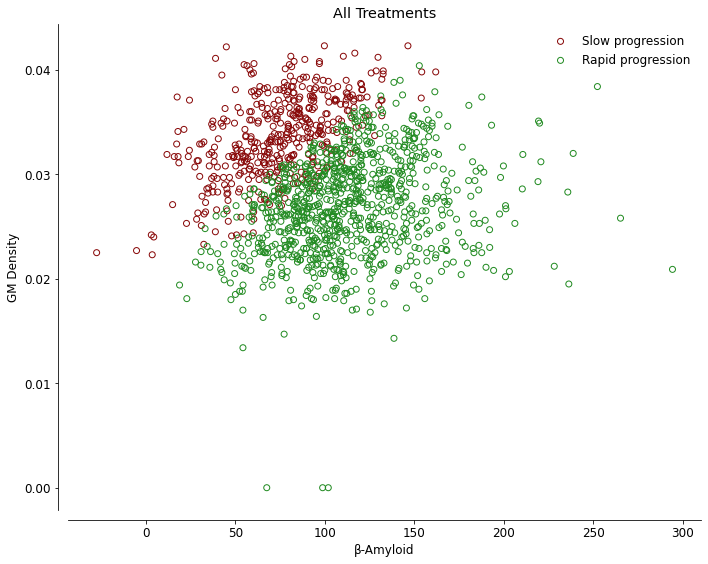

In [2]:
"""This script generates a scatter plot to visualize the relationship between 
β-Amyloid levels and GM Density for different PPM-stratified groups.
The plot is saved as an EPS file."""

# Load the data
df_adscore_all = pd.read_csv("data/df_adscore_all.csv")

# Configure plot font
plt.rcParams.update({
    'font.size': 12,
})

# Create the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot data by category
colors = {'Slow progression': '#880808', 'Rapid progression': '#228B22'}
for category in ['Slow progression', 'Rapid progression']:
    subset = df_adscore_all[df_adscore_all['ad_category'] == category]
    ax.scatter(subset['FBP Composite (SUVRCWM)'], subset['GM_SCORE'], label=category, facecolors='none', color=colors[category])

# Set labels and title
ax.set_title('All Treatments')
ax.set_xlabel('β-Amyloid')
ax.set_ylabel('GM Density')

# Adjust spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

# Configure legend
ax.legend(loc='upper right', frameon=False)

# Finalize plot
plt.tight_layout()
plt.show()

# Save the plot
output_path = 'figures/Figure2_A.eps'
fig.savefig(output_path, format='eps', transparent=True)


# Distribution plot

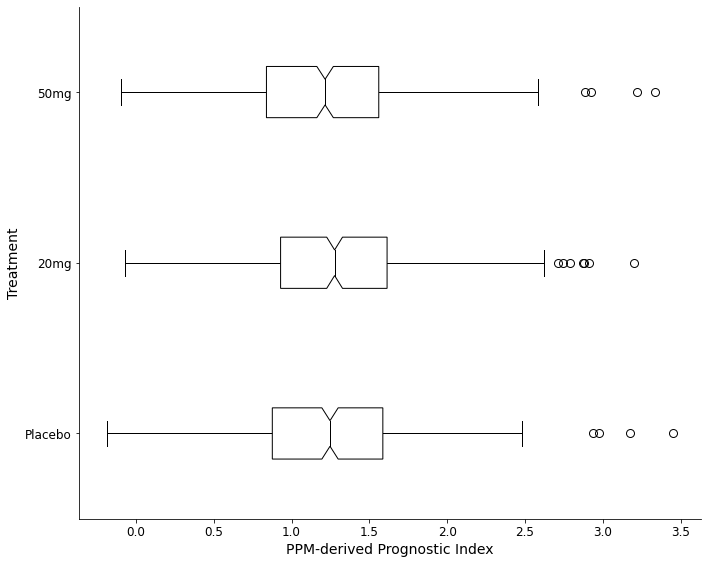

In [ ]:
"""
Script for generating a black-and-white horizontal box plot of normalized PPM-derived prognostic index
for different treatment groups using Matplotlib.

Usage:
- Ensure the input CSV file ('data/df_adscore_all.csv') exists and contains the required columns:
  '3' (for  PPM-derived prognostic index) and 'Treatment Information' (categorical data for grouping).
- The output plot will be saved as an EPS file in the 'figures' directory.

Dependencies:
- pandas
- matplotlib
"""

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("data/df_adscore_all.csv")

# Normalize the column named 'PPM' by subtracting 0.4
df['normalized_PPM'] = df["PPM"] - 0.4

# Create a black-and-white horizontal box plot using Matplotlib
plt.figure(figsize=(10, 8))  # Set the figure size

# Generate the box plot for each treatment group
boxplot = plt.boxplot(
    [
        df[df['Treatment Information'] == 'Placebo']['normalized_PPM'],  # Data for Placebo group
        df[df['Treatment Information'] == 'LY3314814-20mg']['normalized_PPM'],  # Data for 20mg group
        df[df['Treatment Information'] == 'LY3314814-50mg']['normalized_PPM']  # Data for 50mg group
    ],
    labels=['Placebo', '20mg', '50mg'],  # Labels for the groups
    notch=True,  # Enable notched box plots
    patch_artist=True,  # Enable custom box styles
    flierprops=dict(marker='o', color='black', markersize=8),  # Customize outlier markers
    vert=False,  # Horizontal orientation
    boxprops=dict(facecolor='white', color='black'),  # Box style
    whiskerprops=dict(color='black'),  # Whisker style
    capprops=dict(color='black'),  # Cap style
    medianprops=dict(color='black'),  # Median line style
    showfliers=True  # Show outliers (set to False to hide them)
)
# Extract metadata from the box plot
metadata = {
    "Group": ['Placebo', '20mg', '50mg'],
    "Median": [line.get_xdata()[0] for line in boxplot['medians']],  # Extract median values
    "Q1 (25th Percentile)": [patch.get_path().vertices[0][0] for patch in boxplot['boxes']],  # Extract Q1
    "Q3 (75th Percentile)": [patch.get_path().vertices[2][0] for patch in boxplot['boxes']],  # Extract Q3
    "Lower Whisker": [line.get_xdata()[1] for line in boxplot['whiskers'][::2]],  # Extract lower whisker
    "Upper Whisker": [line.get_xdata()[1] for line in boxplot['whiskers'][1::2]],  # Extract upper whisker
    "Outliers": [line.get_xdata().tolist() for line in boxplot['fliers']]  # Extract outliers
}

# Convert metadata to a DataFrame
metadata_df = pd.DataFrame(metadata)

# Save metadata to a CSV file
metadata_df.to_csv('figures/Figure2_B.csv', index=False)

# Customize the plot appearance
plt.xlabel('PPM-derived Prognostic Index', fontsize=14)  # X-axis label
plt.ylabel('Treatment', fontsize=14)  # Y-axis label
plt.tick_params(labelsize=12)  # Adjust tick label size
plt.grid(False)  # Disable grid lines
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine

# Save the figure as an EPS file
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('figures/Figure2_B.eps', format='eps', dpi=300)

# Display the plot
plt.show()